IMPORTAMOS LIBRERIAS

In [ ]:
!pip install noisereduce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import drive
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras
import os
import librosa
import librosa.display
import numpy as np
from sklearn.model_selection import train_test_split
import noisereduce as nr
import glob
import cv2
import pandas as pd

ACCESO A DRIVE

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


PRE PROCESAMIENTO Y CREACION DE ESPECTOGRAMAS EN ESCALA DE GRIS

In [ ]:

# Ruta a la carpeta de los audios
audios_folder_path = os.listdir('/content/drive/MyDrive/Audios full')


audios_folder_path.sort()

# Ruta a la carpeta donde se guardarán los espectrogramas
spectrograms_folder_path = '/content/drive/MyDrive/spectrograms2'

# Crear la carpeta de los espectrogramas si no existe
if not os.path.exists(spectrograms_folder_path):
    os.makedirs(spectrograms_folder_path)

# Lista de las etiquetas de las palabras


tamaño = (150,150)

# Parámetros para el preprocesamiento de audio
n_mels = 128
sr=16000

# Recorrer cada etiqueta
for label in audios_folder_path:
    # Ruta a la carpeta de la etiqueta actual

    label_folder_path = os.path.join(spectrograms_folder_path, label)
    os.makedirs(label_folder_path, exist_ok=True)

    """
    # Verificar si la carpeta de la etiqueta existe
    if os.path.exists(label_folder_path):
        # Ruta a la carpeta donde se guardarán los espectrogramas de la etiqueta actual
        spectrograms_save_path = os.path.join(spectrograms_folder_path, label + 'Mel')

        # Crear la carpeta de los espectrogramas de la etiqueta actual si no existe
        if not os.path.exists(spectrograms_save_path):
            os.makedirs(spectrograms_save_path)

        # Obtener la lista de archivos de audio en la carpeta de la etiqueta actual
        audio_files = [file for file in os.listdir(label_folder_path) if file.endswith('.wav')]
        """
        # Recorrer cada archivo de audio
    for audio_file in glob.glob(os.path.join('/content/drive/MyDrive/Audios full', label,'*.wav')):
        print("Procesando archivo: {}".format(audio_file))
        # Ruta al archivo de audio actual
        #audio_path = os.path.join(label_folder_path, audio_file)

        # Cargar el audio
        audio,Fs= librosa.load(audio_file,mono=True, sr=16000)
        try:

          # Preprocesar el audio: quitar ruido, silencios y normalizar
          audio1 = librosa.effects.trim(audio, top_db=20) # top_db se esta cortando
          audio2 = librosa.util.normalize(audio1[0], fill=True)
          audio3 = nr.reduce_noise(audio2, sr=Fs) #reduccion ruido



          # Extraer espectrograma de Mel
          mel_spec = librosa.feature.melspectrogram(y=audio3, sr=sr, n_mels=n_mels)
          spectrogram = librosa.power_to_db(mel_spec, ref=np.max)

          # Normalizar espectrograma
          mel_spec_db_norm = (spectrogram - spectrogram.min()) / (spectrogram.max() - spectrogram.min())

          # Redimensionar espectrograma al tamaño deseado
          mel_spec_db_resized = cv2.resize(mel_spec_db_norm, tamaño)

          # Expandir dimensiones del espectrograma para ser compatible con modelo de CNN
          mel_spec_db_resized = tf.expand_dims(mel_spec_db_resized, axis=2)

          # Imprimir mensaje al completar el procesamiento del espectrograma
          print(f"Espectrograma creado: {audio_file}")


          # Guardar imagen en el directorio correspondiente
          image_name = os.path.basename(audio_file).replace(" ", "").replace(".wav", ".png")
          output_img_dir = os.path.join(spectrograms_folder_path, label, image_name)
          if not os.path.exists(output_img_dir):
              tf.keras.preprocessing.image.save_img(output_img_dir, mel_spec_db_resized)

        except TypeError as e:
          print(f'error al procesar {audio_file}: {e}')


Procesando archivo: /content/drive/MyDrive/Audios full/abajo/abajo3.wav
Espectrograma creado: /content/drive/MyDrive/Audios full/abajo/abajo3.wav
Procesando archivo: /content/drive/MyDrive/Audios full/abajo/Abajo4.wav
Espectrograma creado: /content/drive/MyDrive/Audios full/abajo/Abajo4.wav
Procesando archivo: /content/drive/MyDrive/Audios full/abajo/abajo5.wav
Espectrograma creado: /content/drive/MyDrive/Audios full/abajo/abajo5.wav
Procesando archivo: /content/drive/MyDrive/Audios full/abajo/abajo6.wav
Espectrograma creado: /content/drive/MyDrive/Audios full/abajo/abajo6.wav
Procesando archivo: /content/drive/MyDrive/Audios full/abajo/abajo11.wav
Espectrograma creado: /content/drive/MyDrive/Audios full/abajo/abajo11.wav
Procesando archivo: /content/drive/MyDrive/Audios full/abajo/abajo15.wav
Espectrograma creado: /content/drive/MyDrive/Audios full/abajo/abajo15.wav
Procesando archivo: /content/drive/MyDrive/Audios full/abajo/Abajo14.wav
Espectrograma creado: /content/drive/MyDrive/Au

In [ ]:

data2 = os.listdir('/content/drive/MyDrive/spectrograms2')
#ordenar la lista de forma ascendente
data2.sort()

data = []
IMG_SIZE = (150,150) #Definir el tamaño de la imagen

for i, sub_dirs in enumerate(data2):

    print("Extrayendo Directorios:{}".format(sub_dirs))

    for archivo_n in glob.glob(os.path.join('/content/drive/MyDrive/spectrograms2', sub_dirs, '*.png')):

        print("Procesando archivo: {}".format(archivo_n))

        etiqueta =i

        # Leer la imagen y cambiar el tamaño
        image = cv2.imread(archivo_n, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, IMG_SIZE)
        # Verificar que la imagen tenga la forma adecuada (con un solo canal)

        if len(image.shape) == 2:
            image = np.expand_dims(image, axis=-1)

        print('Etiqueta de Elemento: {}'.format(etiqueta))

        data.append((image, etiqueta))

carac = pd.DataFrame(data, columns=['Caracteristicas', 'Etiqueta'])
print(carac)

Extrayendo Directorios:abajo
Procesando archivo: /content/drive/MyDrive/spectrograms2/abajo/abajo3.png
Etiqueta de Elemento: 0
Procesando archivo: /content/drive/MyDrive/spectrograms2/abajo/Abajo4.png
Etiqueta de Elemento: 0
Procesando archivo: /content/drive/MyDrive/spectrograms2/abajo/abajo5.png
Etiqueta de Elemento: 0
Procesando archivo: /content/drive/MyDrive/spectrograms2/abajo/abajo6.png
Etiqueta de Elemento: 0
Procesando archivo: /content/drive/MyDrive/spectrograms2/abajo/abajo11.png
Etiqueta de Elemento: 0
Procesando archivo: /content/drive/MyDrive/spectrograms2/abajo/abajo15.png
Etiqueta de Elemento: 0
Procesando archivo: /content/drive/MyDrive/spectrograms2/abajo/Abajo14.png
Etiqueta de Elemento: 0
Procesando archivo: /content/drive/MyDrive/spectrograms2/abajo/abajo16.png
Etiqueta de Elemento: 0
Procesando archivo: /content/drive/MyDrive/spectrograms2/abajo/abajo17.png
Etiqueta de Elemento: 0
Procesando archivo: /content/drive/MyDrive/spectrograms2/abajo/Abajo20.png
Etiqueta 

In [ ]:
x = np.array(carac.Caracteristicas.tolist())
y = np.array(carac.Etiqueta.tolist())

print(x.shape)
print(y.shape)

(697, 150, 150, 1)
(697,)


In [ ]:
X = np.asarray(x).astype(dtype=np.float32)
y = np.asarray(y).astype(dtype=np.int32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
print(len(X_train))
print(len(y_train))

print(y_train)

557
557
[0 0 1 4 3 2 3 1 1 0 1 1 3 1 0 1 3 0 1 2 4 2 3 2 4 2 4 2 2 2 4 4 1 2 4 1 2
 4 3 3 1 3 0 0 4 3 4 0 0 0 3 4 4 4 2 4 1 0 0 0 0 1 1 4 0 0 4 4 1 3 2 4 2 4
 1 3 3 0 4 2 3 4 0 0 0 2 2 1 4 2 4 0 3 3 0 4 1 0 0 2 1 3 4 2 0 2 1 4 4 1 1
 4 2 2 0 4 2 1 2 1 4 4 1 0 2 0 4 1 1 0 4 0 0 4 1 0 4 3 4 4 1 0 1 3 2 1 3 1
 2 3 4 4 1 3 0 1 1 4 4 0 4 3 4 0 2 4 2 1 2 2 1 0 3 4 1 4 2 4 2 4 1 1 4 2 0
 1 4 2 4 0 2 0 3 1 3 3 1 2 3 1 1 0 3 2 2 0 2 1 2 0 3 1 2 0 2 2 1 3 4 1 3 4
 3 0 1 2 3 3 3 3 3 0 0 4 4 1 0 0 4 4 0 3 2 2 4 2 3 2 2 1 0 4 1 0 2 1 0 1 1
 4 2 2 1 4 3 3 1 4 4 3 3 3 4 4 4 0 3 1 3 1 2 1 4 2 2 4 3 1 3 3 1 3 4 0 3 4
 3 0 0 2 4 0 0 1 2 4 1 3 3 3 3 0 4 0 3 0 1 2 3 3 2 0 0 3 3 4 1 4 2 2 1 3 3
 1 4 2 4 0 0 3 2 2 1 2 4 1 3 4 3 3 3 4 1 3 2 3 2 1 0 4 0 1 1 2 3 1 0 2 2 1
 2 1 2 0 1 1 3 1 2 4 0 2 3 4 1 4 3 4 3 2 4 3 1 3 3 0 1 4 2 1 3 2 2 4 2 1 2
 2 2 1 4 4 3 2 3 4 4 4 4 3 0 1 1 3 0 3 1 4 4 4 0 4 1 3 3 4 1 2 2 4 1 0 4 3
 0 4 2 3 0 0 1 0 0 4 1 3 2 2 2 2 4 3 0 0 3 0 4 3 0 0 1 0 3 2 1 1 0 2 2 1 3
 3 4 1 1 1 3 2 3 

In [ ]:
print("Imagenes de entrenamiento Tamaño:%s, Tamaño de las etiquetas%s" %(X_train.shape, y_train.shape))
print("Imagenes de entrenamiento Tamaño:{0}, Tamaño de las etiquetas:{1}".format(X_test.shape, y_test.shape))


Imagenes de entrenamiento Tamaño:(557, 150, 150, 1), Tamaño de las etiquetas(557,)
Imagenes de entrenamiento Tamaño:(140, 150, 150, 1), Tamaño de las etiquetas:(140,)


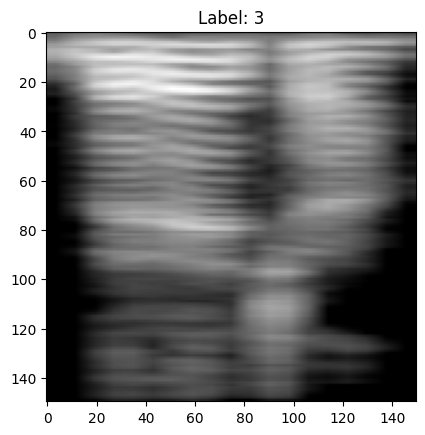

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(X_train[50], cmap='gray')
plt.gca().set_title('Label: '+str(y_train[50]))
plt.show()

#modelo

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import initializers
from tensorflow.keras.regularizers import L2
import tensorflow.keras.layers as LK
import tensorflow.keras.models as MK
from tensorflow.keras.regularizers import L2
from tensorflow.keras import initializers


input = LK.Input(shape=(150, 150, 1))
Conv1 = LK.Conv2D(16, (3, 3), padding='same', activation='relu', kernel_initializer=initializers.he_normal(), kernel_regularizer=L2(0.001))(input)
Pool1 = LK.MaxPool2D((2, 2))(Conv1)
Conv2 = LK.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer=initializers.he_normal(), kernel_regularizer=L2(0.001))(Pool1)
Pool2 = LK.MaxPool2D((2, 2))(Conv2)
Conv3 = LK.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer=initializers.he_normal(), kernel_regularizer=L2(0.001))(Pool2)
Pool3 = LK.MaxPool2D((2, 2))(Conv3)
Conv4 = LK.Conv2D(128, (3, 3), padding='same', activation='relu', kernel_initializer=initializers.he_normal(), kernel_regularizer=L2(0.001))(Pool3)
Pool4 = LK.MaxPool2D((2, 2))(Conv4)
Conv5 = LK.Conv2D(256, (3, 3), padding='same', activation='relu', kernel_initializer=initializers.he_normal(), kernel_regularizer=L2(0.001))(Pool4)
Pool5 = LK.MaxPool2D((2, 2))(Conv5)
flat = LK.Flatten()(Pool5)

FC1 = LK.Dense(256, activation='relu')(flat)
FC1 = LK.Dropout(0.35)(FC1)
output = LK.Dense(5, activation='softmax')(FC1)

"""
input = LK.Input(shape=(150,150,1))
Conv1 = LK.Conv2D(32,(3,3), padding = 'valid', activation = 'relu', kernel_initializer = initializers.he_normal(), kernel_regularizer=L2(0.01))(input)
Pool1 = LK.MaxPool2D((2,2),(2,2))(Conv1)
Conv2 = LK.Conv2D(64,(3,3), padding = 'valid', activation = 'relu', kernel_initializer = initializers.he_normal(), kernel_regularizer=L2(0.01))(Pool1)
Pool2 = LK.MaxPool2D((2,2),(2,2))(Conv2)
#Conv3 = LK.Conv2D(128,(3,3), padding = 'valid', activation = 'relu', kernel_initializer = initializers.he_normal(), kernel_regularizer=L2(0.01))(Pool2)
#Pool3 = LK.MaxPool2D((2,2),(2,2))(Conv3)
flat = LK.Flatten()(Pool2)

FC3 = LK.Dense(120, activation = 'relu')(flat)
FC4 = LK.Dense(84, activation = 'relu')(FC3)
#FC5 = LK.Dense(90,activation = 'relu')(FC4)
output = LK.Dense(5, activation = 'softmax')(FC4)
"""

"\ninput = LK.Input(shape=(150,150,1))\nConv1 = LK.Conv2D(32,(3,3), padding = 'valid', activation = 'relu', kernel_initializer = initializers.he_normal(), kernel_regularizer=L2(0.01))(input)\nPool1 = LK.MaxPool2D((2,2),(2,2))(Conv1)\nConv2 = LK.Conv2D(64,(3,3), padding = 'valid', activation = 'relu', kernel_initializer = initializers.he_normal(), kernel_regularizer=L2(0.01))(Pool1)\nPool2 = LK.MaxPool2D((2,2),(2,2))(Conv2)\n#Conv3 = LK.Conv2D(128,(3,3), padding = 'valid', activation = 'relu', kernel_initializer = initializers.he_normal(), kernel_regularizer=L2(0.01))(Pool2)\n#Pool3 = LK.MaxPool2D((2,2),(2,2))(Conv3)\nflat = LK.Flatten()(Pool2)\n\nFC3 = LK.Dense(120, activation = 'relu')(flat)\nFC4 = LK.Dense(84, activation = 'relu')(FC3)\n#FC5 = LK.Dense(90,activation = 'relu')(FC4)\noutput = LK.Dense(5, activation = 'softmax')(FC4)\n"

COMPILACION DEL MODELO MELITICO

In [ ]:
model= MK.Model(input,output)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496 

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

AHORA VOY A ENTRENAR EL MODELO

In [ ]:
tf.keras.backend.clear_session #entrena desde cero

<function keras.backend.clear_session()>

In [ ]:
model.save_weights('modelitoMelo.h5')

In [ ]:
model.load_weights('modelitoMelo.h5')

In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=80, validation_data=(X_test, y_test), verbose=1)
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print('Loss: {0} - Accuracy: {1}'.format(loss, acc))

Epoch 1/200
7/7 [==============================] - 15s 252ms/step - loss: 460.9081 - accuracy: 0.2083 - val_loss: 41.0171 - val_accuracy: 0.2143
Epoch 2/200
7/7 [==============================] - 0s 39ms/step - loss: 29.5510 - accuracy: 0.2478 - val_loss: 6.6946 - val_accuracy: 0.2000
Epoch 3/200
7/7 [==============================] - 0s 39ms/step - loss: 5.7637 - accuracy: 0.3106 - val_loss: 2.9791 - val_accuracy: 0.4500
Epoch 4/200
7/7 [==============================] - 0s 38ms/step - loss: 2.6226 - accuracy: 0.4273 - val_loss: 2.6980 - val_accuracy: 0.3429
Epoch 5/200
7/7 [==============================] - 0s 37ms/step - loss: 2.3675 - accuracy: 0.4237 - val_loss: 2.3185 - val_accuracy: 0.5214
Epoch 6/200
7/7 [==============================] - 0s 37ms/step - loss: 2.2305 - accuracy: 0.4919 - val_loss: 2.2073 - val_accuracy: 0.5929
Epoch 7/200
7/7 [==============================] - 0s 38ms/step - loss: 2.0465 - accuracy: 0.5799 - val_loss: 2.0986 - val_accuracy: 0.6000
Epoch 8/200
7/

In [ ]:
model.save('ModeloReMelo1.h5')

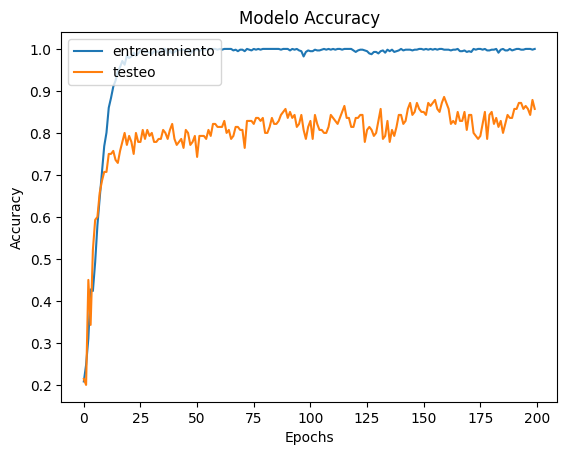

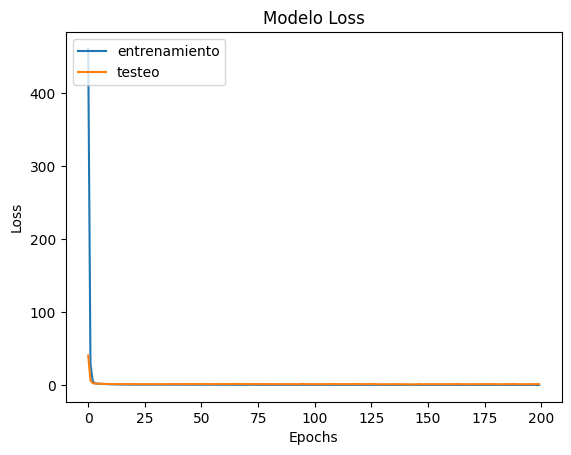

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modelo Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['entrenamiento', 'testeo'], loc="upper left")
plt.show()
#Loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Modelo Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['entrenamiento', 'testeo'], loc="upper left")
plt.show()

5/5 [==============================] - 0s 6ms/step


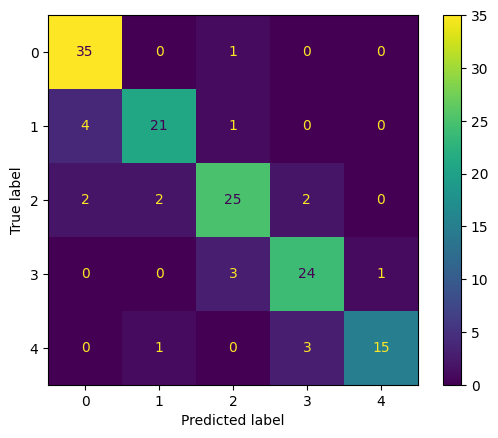

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
y_pred = model.predict(X_test)
result = confusion_matrix(y_test, y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(result)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
# Obtener las probabilidades de las clases para el conjunto de prueba
y_prob = model.predict(X_test)

# Obtener la clase con la mayor probabilidad para cada muestra
y_pred = np.argmax(y_prob, axis=1)

# Imprimir el reporte de clasificación
target_names = ['Abajo', 'Arriba', 'Cambiar', 'Derecha', 'Izquierda']
print(classification_report(y_test, y_pred, target_names=target_names))

5/5 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

       Abajo       0.85      0.97      0.91        36
      Arriba       0.88      0.81      0.84        26
     Cambiar       0.83      0.81      0.82        31
     Derecha       0.83      0.86      0.84        28
   Izquierda       0.94      0.79      0.86        19

    accuracy                           0.86       140
   macro avg       0.87      0.85      0.85       140
weighted avg       0.86      0.86      0.86       140



In [ ]:
from sklearn.metrics import roc_auc_score

# predict probabilities for test set
y_probs = model.predict(X_test, verbose=0)

# Obtener las probabilidades para la clase positiva
y_probs_positive = y_probs[:, 1]

# Crear un array de valores binarios para los verdaderos valores de clase
y_true_binary = np.zeros(len(y_test))
y_true_binary[y_test == 1] = 1

# Calcular ROC AUC
roc_auc = roc_auc_score(y_true_binary, y_probs_positive)

print('ROC AUC: %.3f' % roc_auc)

ROC AUC: 0.958


In [ ]:
Model=MK.load_model('ModeloReMelo1.h5')

In [ ]:
Model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496 

In [ ]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
RECORD = '''
const sleep = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: {sampleSize: 16, channelCount: 1, sampleRate: 16000  }})
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
'''

def record(sec, filename='audio.wav'):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec * 1000))
  b = b64decode(s.split(',')[1])
  with open(filename, 'wb+') as f:
    f.write(b)

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)




print(f"Hable máximo 2 segundos")
record(2,'audio.wav')

Hable máximo 2 segundos


<IPython.core.display.Javascript object>

In [ ]:
print(f"Hable máximo 2 segundos")
record(2,'audio.wav')
FS=16000
tamaño = (150, 150) #Definir el tamaño de la imagen

audio,Fs= librosa.load('audio.wav',mono=True, sr=16000)

audio1 = librosa.effects.trim(audio, top_db=20) # top_db se esta cortando
audio2 = librosa.util.normalize(audio1[0], fill=True)
audio3 = nr.reduce_noise(audio2, sr=Fs) #reduccion ruido

# Extracción de características
#F_melspec = librosa.feature.melspectrogram(y=audio_noise_reduce, sr=FS, n_mels=120, n_fft=2048, hop_length=512, win_length=25, window='hamming')
# Extraer espectrograma de Mel
mel_spec = librosa.feature.melspectrogram(y=audio3, sr=sr, n_mels=n_mels)
spectrogram = librosa.power_to_db(mel_spec, ref=np.max)

# Normalizar espectrograma
mel_spec_db_norm = (spectrogram - spectrogram.min()) / (spectrogram.max() - spectrogram.min())

# Redimensionar espectrograma al tamaño deseado
mel_spec_db_resized = cv2.resize(mel_spec_db_norm, tamaño)

# Expandir dimensiones del espectrograma para ser compatible con modelo de CNN
mel_spec_db_resized = tf.expand_dims(mel_spec_db_resized, axis=2)


# Hacer predicción del modelo sobre el espectrograma
preds = Model.predict(np.array([mel_spec_db_resized]))
pred_class = np.argmax(preds)

salidas2=['abajo', 'arriba', 'cambiar', 'derecha', 'izquierda']

# Imprimir resultado de la predicción
print(pred_class)
print(f"La clase predicha es: {salidas2[pred_class]}")

Hable máximo 2 segundos


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 58ms/step
2
La clase predicha es: cambiar
